# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name | Variable |Description | 
| :--- | :--- | :--- | 
| Research Session Attendance|RSA |Records attendence for each week of treatment | 
| Demographics|DEM |Sex, Ethnicity, Race | 
| Urine Drug Screen| UDS  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|DSM |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|MDH |Tracks medical and psychiatric history of 24 different Conditions| 
| Physical Exam|PEX |Tracks the appearance and condition of patients for 12 different physical observations| 
| Pregnancy and Birth Control|PBC |Pregnancy test taken once per month on weeks 0, 4, 8, 12, 16, 20, 24| 
| Timeline Follow Back Survey|TFB |Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24| 
| Dose Record |DOS |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/merged_data.csv')

# Display the first few rows of the data
data.shape

(1917, 431)

### Review RSA Data
Research Session Attendance: RSA<br>
Records attendence for 24 weeks of treatment. <br>
Recorded each week<br>

Descriptive statistics for each week of attendence:<br>
- Avg weekly attendance 851 patients per week
- Avg proportion of patients attending weekly 44%
<br>


<br>
We will plot the weekly distribution of percentage of patients attending treatment

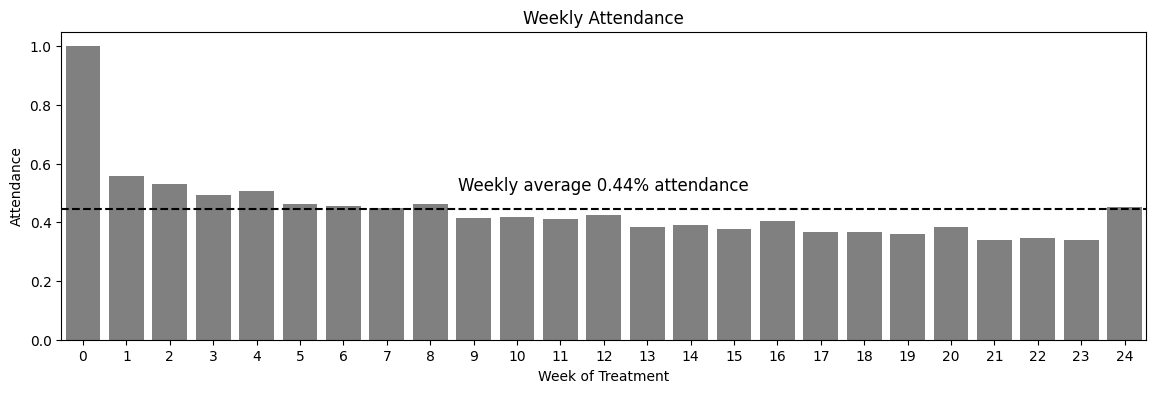

In [2]:
# create df for rsa clinical data
rsa = helper.series_func(data, 'rsa', 'mean')

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)
# create bespoke annotation for this table
plt.annotate(
        f"Weekly average {series.mean().round(2)}% attendance",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    );

In [3]:
# create the markdown table for descriptive statistics
rsa_describe = data[[col for col in data.columns if 'rsa' in col]].describe().T
rsa_describe.to_markdown()
# render through ipython
display(Markdown(rsa_describe.to_markdown()))

|             |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
|:------------|--------:|---------:|---------:|------:|------:|------:|------:|------:|
| rsa_week_0  |    1917 | 1        | 0        |     1 |     1 |     1 |     1 |     1 |
| rsa_week_1  |    1917 | 0.559207 | 0.496612 |     0 |     0 |     1 |     1 |     1 |
| rsa_week_2  |    1917 | 0.529473 | 0.499261 |     0 |     0 |     1 |     1 |     1 |
| rsa_week_3  |    1917 | 0.494523 | 0.5001   |     0 |     0 |     0 |     1 |     1 |
| rsa_week_4  |    1917 | 0.508607 | 0.500056 |     0 |     0 |     1 |     1 |     1 |
| rsa_week_5  |    1917 | 0.461137 | 0.498617 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_6  |    1917 | 0.454356 | 0.498042 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_7  |    1917 | 0.447574 | 0.497374 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_8  |    1917 | 0.462702 | 0.498737 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_9  |    1917 | 0.415754 | 0.49298  |     0 |     0 |     0 |     1 |     1 |
| rsa_week_10 |    1917 | 0.418362 | 0.493419 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_11 |    1917 | 0.410016 | 0.491965 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_12 |    1917 | 0.426708 | 0.494728 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_13 |    1917 | 0.38289  | 0.486219 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_14 |    1917 | 0.389671 | 0.487803 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_15 |    1917 | 0.378195 | 0.485063 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_16 |    1917 | 0.405321 | 0.491082 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_17 |    1917 | 0.366197 | 0.48189  |     0 |     0 |     0 |     1 |     1 |
| rsa_week_18 |    1917 | 0.366719 | 0.482035 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_19 |    1917 | 0.359937 | 0.480107 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_20 |    1917 | 0.383412 | 0.486344 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_21 |    1917 | 0.340636 | 0.474047 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_22 |    1917 | 0.348461 | 0.476607 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_23 |    1917 | 0.341158 | 0.474222 |     0 |     0 |     0 |     1 |     1 |
| rsa_week_24 |    1917 | 0.452791 | 0.497896 |     0 |     0 |     0 |     1 |     1 |

### Review Demographic Data
Demographics: DEM<br>
Data includes response to questions about gender, race and ethnicity<br>
Data includes 12 different responses<br>
Data collected at baseline assessment<br>

<br>

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [4]:
# This code creates an efficient table to view value_counts of the demographics data

# create the demographics dataframe
dem = data[[col for col in data.columns if col.startswith('dem_')]]

# call the helper function to extract the value counts and organize them into a table
result_df = helper.df_value_counts(dem)

# remove index row 2, 5 - these have mostly missing values and not useful for analysis
result_df = result_df.drop(result_df.index[[2,5]])

# remove values with 0.0 - these are the negative binary response, not useful for analysis
result_df = result_df[result_df['value'] != 0.0]

# convert to markdown for portability
result_df.to_markdown()

# display markdown table through ipython display
from IPython.display import display, Markdown
display(Markdown(result_df.to_markdown()))

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

### Review UDS Data
Urine Drug Screen: UDS<br>
Drug test for 8 different drug classes, taken weekly for 24 weeks<br>
Data includes tests for 8 different drug classes<br>

In [7]:
# show all the rows and columns for tests, there are 227 columns
tests = data[[col for col in data.columns if col.startswith('test_')]]

# subset the first 9 columns, to make a list of acronyms for drug tests
# easier to read and understand the data
test_cols = tests.iloc[:,:9]

# the list comprehension uses regex to remove the 2nd underscore and everything to the right
# an example would be transform test_Opiate300_1 to test_Opiate300
test_cols = [re.sub(r'_[^_]*$', '', col) for col in test_cols.columns]

# create acronyms for the drug tests, remove first 5 characters and convert to lowercase
# then use the first 3 characters
# an example would be transform test_Opiate300 to opi
global_cols = [col[5:].lower()[:3] for col in test_cols]

# create a series for each drug class
for i in range(len(test_cols)):
    acronym = global_cols[i]
    test = test_cols[i]
    globals()[acronym] = helper.series_func(data, test, 'mean').round(2)
    globals()[acronym] = globals()[acronym].to_frame(acronym)
    print(acronym,globals()[acronym].shape)

# merge series into dataframe
drug_tests = pd.concat([pro, amp, can, ben, met, oxy, coc, met, opi], axis=1)

drug_tests



pro (25, 1)
amp (25, 1)
can (25, 1)
ben (25, 1)
met (25, 1)
oxy (25, 1)
coc (25, 1)
met (25, 1)
opi (25, 1)


,pro,amp,can,ben,met,oxy,coc,met,opi
0,0.04,0.10,0.25,0.21,0.12,0.15,0.40,0.12,0.85
1,0.40,0.43,0.53,0.48,0.44,0.42,0.58,0.44,0.68
2,0.42,0.44,0.54,0.48,0.45,0.44,0.59,0.45,0.65
3,0.47,0.49,0.58,0.52,0.50,0.48,0.63,0.50,0.67
4,0.47,0.49,0.59,0.52,0.49,0.48,0.63,0.49,0.66
5,0.50,0.52,0.61,0.55,0.53,0.51,0.63,0.53,0.66
6,0.52,0.54,0.62,0.59,0.55,0.54,0.66,0.55,0.70
7,0.53,0.56,0.64,0.59,0.56,0.55,0.68,0.56,0.70
8,0.52,0.54,0.62,0.58,0.55,0.53,0.66,0.55,0.69
9,0.56,0.58,0.66,0.62,0.59,0.58,0.69,0.59,0.71


### Review DSM Data
DSM provides the guidlines for diagnosing mental illness.<br>
<br>
Groupbed by Diagnosis<br>
<br>
**Abuse**
| drugclass          | value   |   count |   percentage |
|:----------------|:--------|--------:|-------------:|
| dsm_cannabis    | abuse   |     218 |         0.11 |
| dsm_cocaine     | abuse   |     185 |         0.1  |
| dsm_sedative    | abuse   |     123 |         0.06 |
| dsm_opiates     | abuse   |       1 |         0    |
| dsm_alcohol     | abuse   |     262 |         0.14 |
| dsm_amphetamine | abuse   |     109 |         0.06 | 

**Dependence**
| drugclass          | value      |   count |   percentage |
|:----------------|:-----------|--------:|-------------:|
| dsm_cannabis    | dependence |      73 |         0.04 |
| dsm_cocaine     | dependence |     305 |         0.16 |
| dsm_sedative    | dependence |      90 |         0.05 |
| dsm_opiates     | dependence |    1486 |         0.78 |
| dsm_alcohol     | dependence |     102 |         0.05 |
| dsm_amphetamine | dependence |      67 |         0.03 |

**No Diagnosis**
 | drugclass          | value        |   count |   percentage |
|:----------------|:-------------|--------:|-------------:|
| dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| dsm_cocaine     | no_diagnosis |     997 |         0.52 |
| dsm_sedative    | no_diagnosis |    1274 |         0.66 |
| dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
| dsm_amphetamine | no_diagnosis |    1311 |         0.68 |

In [ ]:
# This is the code that creates the markdown table above

# get the columns for the dsm data
dsm = data[[col for col in data.columns if col.startswith('dsm_')]]

# call helper function to extract the value counts and organize them into a table
dsm_vc = helper.df_value_counts(dsm)

# convert to markdown
dsm_vc.to_markdown()

# display markdown table through ipython display
display(Markdown(dsm_vc.to_markdown()))


In [ ]:
# reogroup the data into three tables to make it easier to read

# create list of diagnosis to loop through
diagnosis = ['abuse', 'dependence', 'no_diagnosis']

# iterate through each diagnosis
for disorder in diagnosis:
    # create a dataframe for ea disorder
    globals()[disorder] = dsm_vc[dsm_vc['value']==disorder]
    # convert to markdown
    globals()[disorder].to_markdown()
    # print the disorder before the ipython display
    print(disorder)
    display(Markdown(globals()[disorder].to_markdown()))
    